<h1><center>«Portfolio-Exam Part II» </center></h1>
<h2><center>MADS-ML </center></h2>
<h3><center>Author: Tom Wüsten </center></h3>

### Abstract
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 
	 <br>



### Attribute Information:

Input variables:
#### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
#### related with the last contact of the current campaign: 
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). <br>
Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. <br>
Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>
#### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric) <br>
17 - cons.price.idx: consumer price index - monthly indicator (numeric) <br>
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) <br>
19 - euribor3m: euribor 3 month rate - daily indicator (numeric) <br>
20 - nr.employed: number of employees - quarterly indicator (numeric) <br>

#### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>


### Outline
* [Data Cleansing](#1) <br>
* [Data Exploration](#2) <br>
* [Data Preparation](#3) <br>
* [Classification](#4) <br>
	* [Decision Tree](#5) <br>
	* [Random Forest](#6) <br>
	* [balanced Random Forest](#7) <br>
	* [Support Vector Machines](#8) <br>
* [Interpretation](#9) <br>

In [4]:
#Load Libaries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing, tree
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, plot_confusion_matrix
import sklearn.metrics as ms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, tree
import seaborn as sns
import math

### Data Cleansing <a id='1'></a> 
In Data Cleansing the data is checked for duplicates and missing values.

In [18]:
# Load Data
df = pd.read_csv("bank-additional-full.csv", sep = ";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


The first step in Data Cleaning is checking if the data set contains duplicated rows. The data set contains 12 full duplicates. <br> 
Since each row depicts one person, the same rows are erroneous data. That is why the duplicates are deleted from the data set.

In [19]:
duplicated_rows = df[df.duplicated() == True]
print("The dataset contains "+ str(duplicated_rows.shape[0]) + " fully duplicatated rows.")
print(df.shape)
df = df.drop_duplicates()
df.shape

The dataset contains 12 fully duplicatated rows.
(41188, 21)


(41176, 21)

The next step in data cleaning is to analyse whether there is missing data in the columns. The result of the analysis is that the dataset has no missing data.

In [20]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

### Data Exploration <a id='2'></a> 
The data set contains 21 features. The features are numerical (10) and categorical (11). Every row represents a customer which was called by an agent from the bank. The data set contains 41176 persons.

In [8]:
df.shape

(41176, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
numerical_features =df.select_dtypes(["int64", 'float64'])
numerical_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


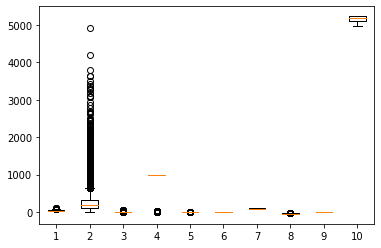

In [12]:
plt.boxplot(numerical_features)
plt.show()

The feature y shows whether a contract has been concluded after a conversation with the bank employee. A successful contract was concluded for 11.27% and the remaining 88.73% did not conclude a contract. The distribution of the data shows that only a small number of customers concluded the contract. For the later creation of the machine learning model, we must ensure that the same distribution of training examples and test data is maintained. The methods of implementation are shown in the Data Preparation chapter.


In [13]:
distribution = df["y"].value_counts()
print("The dataset contains:"+ str(df.shape[0]) + " samples of phone calls with customers. The subcription of term negative is "+ str(round(distribution[0]/df.shape[0]*100,2)) + "% and the subcription of term positive is "+ str(round(distribution[1]/df.shape[0]*100,2)) + "%.")
print(distribution)

The dataset contains:41176 samples of phone calls with customers. The subcription of term negative is 88.73% and the subcription of term positive is 11.27%.
no     36537
yes     4639
Name: y, dtype: int64


### Data Preparation <a id='3'></a> 

The owner of the dataset provides the information that the feature duration has high impact of the prediction and is not known before the call. Therefore this feature will not be used in ML modells. In order to use the ML models Decision Tree and Random Forest for the later classification, all features must be available in numerical format. For the conversion of the features I use One-Hot Encoding. In one hot encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category. The only exception is the feature y, as this is my target variable.  For this feature I don't want an additional column, so I use the label encoding. Each value is converted into an integer value. Here, True is converted to 1 and False to 0.  

In [21]:
# Drop feature Duration
df = df.drop("duration", 1)

C:\Users\wuest\AppData\Local\Temp/ipykernel_12868/2800050893.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop("duration", 1)


In [22]:
# Encode feature y in numeric feature 
lb_make = LabelEncoder()
df['y']= lb_make.fit_transform(df['y'])

Machine Learning Setup:
split target in y <br>
convert  x <br>
splitting dataset in train and test data <br>
30% test data and 70% traning data <br>
use stratify because of imbalaced dataset <br>
use the standardscaler to scale X_train and X_test to have similar averages and standard distribution

In [23]:
# set traget variable
y = df["y"]
# Delete target feature from dataframe
df= df.iloc[: , :-1]
# Encoode categorical feature via dummy encoding into numeric feature
X = pd.get_dummies(df, columns=['job', 'marital', 'education','default','housing', 'loan','contact','month','day_of_week','poutcome'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify= y, shuffle=True)
scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train_sc = scaler1.transform(X_train)
X_test_sc = scaler1.transform(X_test)

### Classification <a id='4'></a> 

In [24]:
def cross_validate_setting(X,y,model, params):
    """ Form a cross validate setting.
     
    Keywords arguments:
    X       -- input data as dataframe
    y       -- target as dataframe
    model   -- classifier as estimator object
    params  -- hyperparameter as dict
    """    
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=1)
    clf = GridSearchCV(model, params, scoring='balanced_accuracy', cv=cv, n_jobs = -1)
    search = clf.fit(X,y)
    return search

In [25]:
evaluation_df = pd.DataFrame({'algorithm':[], 'accuracy':[],'balanced accuracy':[], 'confusion matrix':[],'best hyperparameters':[]})

In [26]:
def calc_accuracy_score(model,x_train,y_train,x_test,y_test):
    """calculate the accuracy of a model
    
    Keywords arguments:
    x_train -- train data as dataframe
    y_train -- train target as dataframe
    x_test  -- test data as dataframe
    y_test  -- test target as dataframe
    model   -- classifier as estimator object
    
    """
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(accuracy_score(y_test, y_test_pred))
    return accuracy_score(y_test, y_test_pred)

In [27]:
def calc_balanced_accuracy_score(model,x_train,y_train,x_test,y_test):
    """calculate the balanced accuracy of a model
    
    Keywords arguments:
    x_train -- train data as dataframe
    y_train -- train target as dataframe
    x_test  -- test data as dataframe
    y_test  -- test target as dataframe
    model   -- classifier as estimator object
    
    """
    model.fit(x_train, y_train)
    y_test_pred = model.predict(x_test)
    print(balanced_accuracy_score(y_test, y_test_pred))
    return balanced_accuracy_score(y_test, y_test_pred)

#### Decision Tree <a id='5'></a> 

In [28]:
clf = tree.DecisionTreeClassifier(criterion='gini')
max_depth_range = list(range(2,15))
hyperparameter = {"max_depth": max_depth_range}
score = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score.best_params_)
print(score.best_score_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['Decision tree'], 'best hyperparameters':[score.best_params_]}),ignore_index=True)


{'max_depth': 5}
0.6252399594768366


In [29]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
evaluation_df.iloc[0,1] = calc_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)
model = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
evaluation_df.iloc[0,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.9005099975714401
0.6228325714890935


[[10756   205]
 [ 1024   368]]


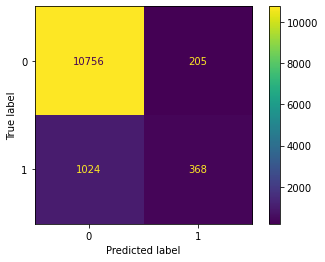

In [31]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=5)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
evaluation_df.iloc[0,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]

#### Random Forest <a id='6'></a> 

In [32]:
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_random_forest = cross_validate_setting(X_train_sc,y_train,clf,hyperparameter)
print(score_random_forest.best_params_)
print(score_random_forest.best_score_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['RandomForest'], 'best hyperparameters':[score_random_forest.best_params_]}),ignore_index=True)


{'max_depth': 10, 'n_estimators': 1}
0.6110118168660261


In [33]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
evaluation_df.iloc[1,1] = calc_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
evaluation_df.iloc[1,2] = calc_balanced_accuracy_score(model,X_train_sc, y_train, X_test_sc, y_test)

0.8964623977981058
0.6020505892364465


[[10765   196]
 [ 1083   309]]


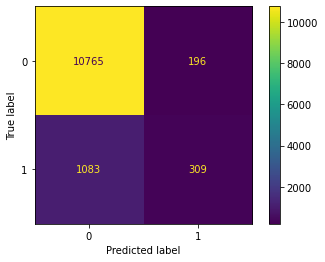

In [34]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=1)
clf.fit(X_train_sc, y_train)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
rdf = y_test_pred
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
evaluation_df.iloc[1,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]

#### balenced Random Forest <a id='7'></a> 

In [35]:
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X_train_sc, y_train)
clf = RandomForestClassifier()
hyperparameter = {"max_depth": [2,3,5,10], "n_estimators": [1,10,100]}
score_balanced_random_forest = cross_validate_setting(X_res,y_res,clf,hyperparameter)
print(score_balanced_random_forest.best_params_)
evaluation_df = evaluation_df.append(pd.DataFrame({'algorithm':['balanced RandomForest'], 'best hyperparameters':[score_balanced_random_forest.best_params_]}),ignore_index=True)

{'max_depth': 10, 'n_estimators': 10}


In [36]:
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=10)
evaluation_df.iloc[2,1] = calc_accuracy_score(model,X_res, y_res, X_test_sc, y_test)
model = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
evaluation_df.iloc[2,2] = calc_balanced_accuracy_score(model,X_res, y_res, X_test_sc, y_test)

0.853557840200761
0.7595335067276142


[[9729 1232]
 [ 513  879]]


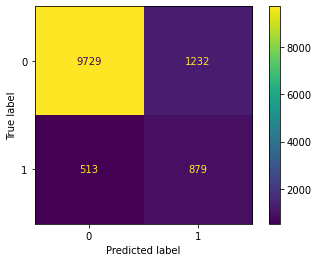

In [37]:
clf = RandomForestClassifier(criterion='gini', random_state=1, max_depth=10,n_estimators=100)
clf.fit(X_res, y_res)
y_test_pred = clf.predict(X_test_sc)
print(confusion_matrix(y_test, y_test_pred))
balenced_rdf = y_test_pred
ms.ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
evaluation_df.iloc[2,3] = [np.array(confusion_matrix(y_test, y_test_pred),dtype=object)]

#### Support Vector Machine <a id='8'></a> 

In [38]:
from matplotlib import colors
cmap = colors.ListedColormap(['dodgerblue', 'darkorange'])

# Plot the dataset together with additional content and store under the given filename
# X the dataset
# y the labels
# content_func a function that is executed to plot specific content into the otherwise standardized diagram
def plot_svm(X, y, content_func):
    X_0=X.iloc[:, 0] # values in dim 0
    X_1=X.iloc[:, 1] # values in dim 1

    f = plt.figure(figsize=(15, 15))
    ax = plt.gca()
    scatter=ax.scatter(X_0, X_1, c=y, s=50, cmap=cmap, label=y)
    
    ax.set_aspect('equal', 'box') # otherwise our linear classifier will look warped
    ax.set_xlim(0,math.ceil(1.1*X_0.max()))
    ax.set_ylim(0,math.ceil(1.1*X_1.max()))  
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    
    content_func(ax)
    
    L=ax.legend(*scatter.legend_elements(),
                    bbox_to_anchor=(1,0.4), loc="center right", title="classes", ncol=1)
    L.get_texts()[1].set_text('+1') # special handling of +1 in the legend

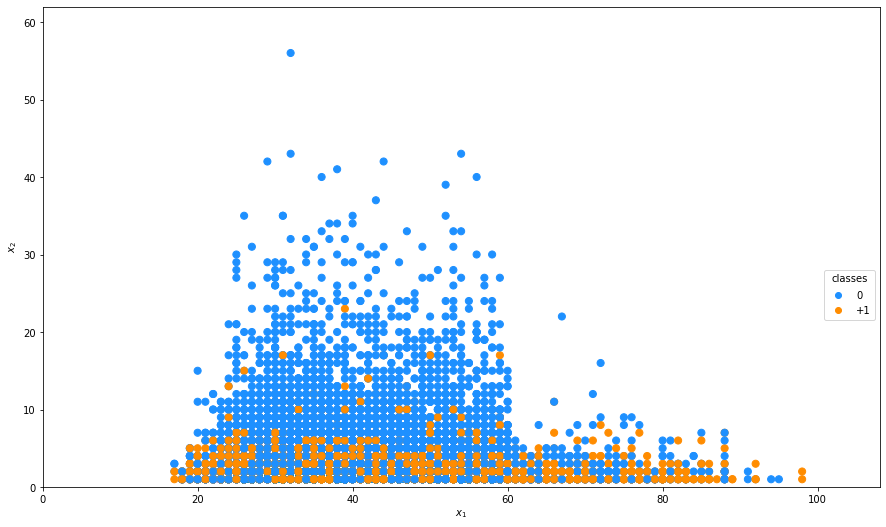

In [40]:
def no_content(ax):
    pass
plot_svm(X, y, no_content)

In [42]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with



h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])


C:\Users\wuest\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


TypeError: '(slice(None, None, None), 0)' is an invalid key